In [2]:
import pandas as pd

df = pd.read_csv('../data/raw/AAPL.csv', parse_dates=['Date'])
df = df.set_index('Date').sort_index()
print(df.head())


               Close      High       Low      Open      Volume
Date                                                          
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800


In [10]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from pynance import data
import yfinance as yf


class StockAnalysis:
    """
    Class for quantitative analysis of stock data using TA-Lib and PyNance.
    """

    def __init__(self, df):
        """
        Initialize with a stock DataFrame.
        df must have columns: Open, High, Low, Close, Volume
        """
        self.df = df.copy()
        print(f"Stock data loaded with {self.df.shape[0]} rows.")

    # ---------------------------
    # Technical Indicators
    # ---------------------------
    def add_technical_indicators(self):
        """
        Add some common TA-Lib indicators: SMA, EMA, RSI, MACD
        """
        # Simple Moving Average
        self.df['SMA_20'] = talib.SMA(self.df['Close'], timeperiod=20)
        self.df['SMA_50'] = talib.SMA(self.df['Close'], timeperiod=50)

        # Exponential Moving Average
        self.df['EMA_20'] = talib.EMA(self.df['Close'], timeperiod=20)

        # Relative Strength Index
        self.df['RSI_14'] = talib.RSI(self.df['Close'], timeperiod=14)

        # MACD
        macd, macdsignal, macdhist = talib.MACD(self.df['Close'])
        self.df['MACD'] = macd
        self.df['MACD_Signal'] = macdsignal
        self.df['MACD_Hist'] = macdhist

        print("Technical indicators added.")

    # ---------------------------
    # PyNance Financial Metrics
    # ---------------------------
    def get_financial_metrics(self, ticker):
        """
        Fetch financial metrics using PyNance.
        Example: market cap, P/E, EPS, revenue.
        """
        ticker_obj = yf.Ticker(ticker)
        info = ticker_obj.info
        metrics = {
            'marketCap': info.get('marketCap'),
            'trailingPE': info.get('trailingPE'),
            'epsTrailingTwelveMonths': info.get('epsTrailingTwelveMonths'),
            'totalRevenue': info.get('totalRevenue'),
        }
        return metrics

    # ---------------------------
    # Visualizations
    # ---------------------------
    def plot_price_with_sma(self):
        """
        Plot Close price along with SMA lines.
        """
        plt.figure(figsize=(14,7))
        plt.plot(self.df['Close'], label='Close Price', color='blue')
        plt.plot(self.df['SMA_20'], label='SMA 20', color='orange')
        plt.plot(self.df['SMA_50'], label='SMA 50', color='green')
        plt.title('Stock Price with SMA')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    def plot_rsi(self):
        """
        Plot RSI indicator.
        """
        plt.figure(figsize=(14,4))
        plt.plot(self.df['RSI_14'], label='RSI 14', color='red')
        plt.axhline(70, color='black', linestyle='--')
        plt.axhline(30, color='black', linestyle='--')
        plt.title('Relative Strength Index (RSI)')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.legend()
        plt.show()

    def plot_macd(self):
        """
        Plot MACD indicator.
        """
        plt.figure(figsize=(14,4))
        plt.plot(self.df['MACD'], label='MACD', color='blue')
        plt.plot(self.df['MACD_Signal'], label='MACD Signal', color='orange')
        plt.bar(self.df.index, self.df['MACD_Hist'], label='MACD Hist', color='gray')
        plt.title('MACD Indicator')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()


Stock data loaded with 3774 rows.
Technical indicators added.


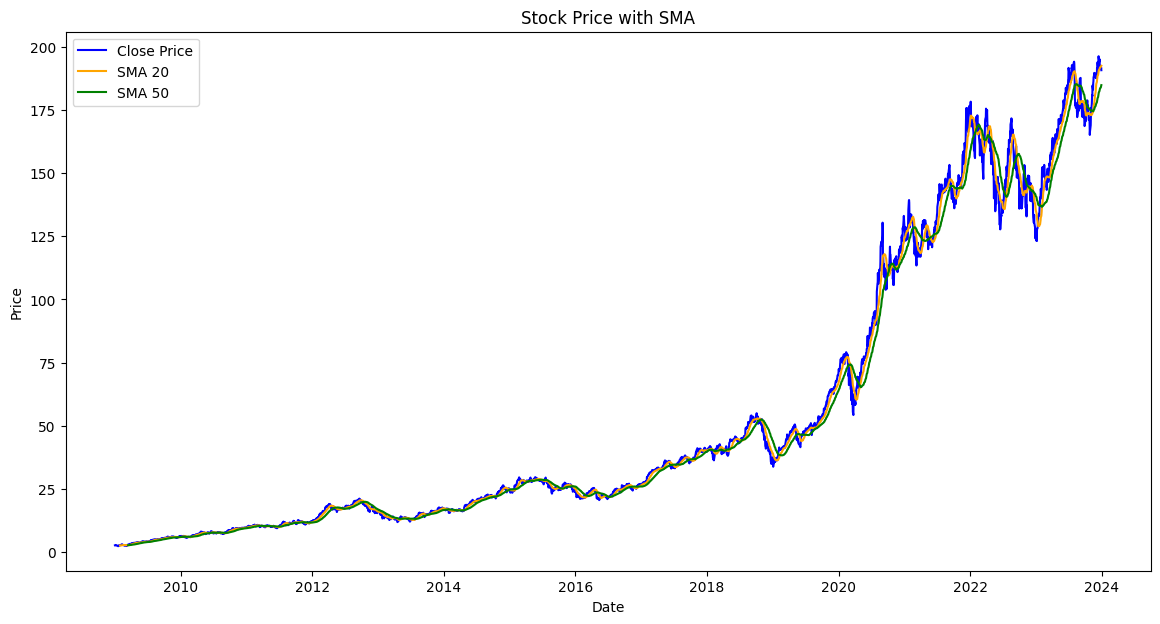

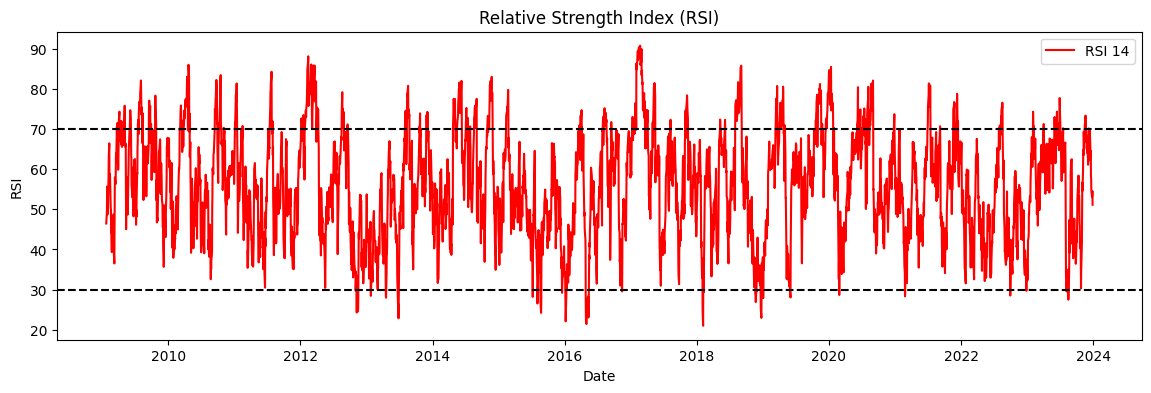

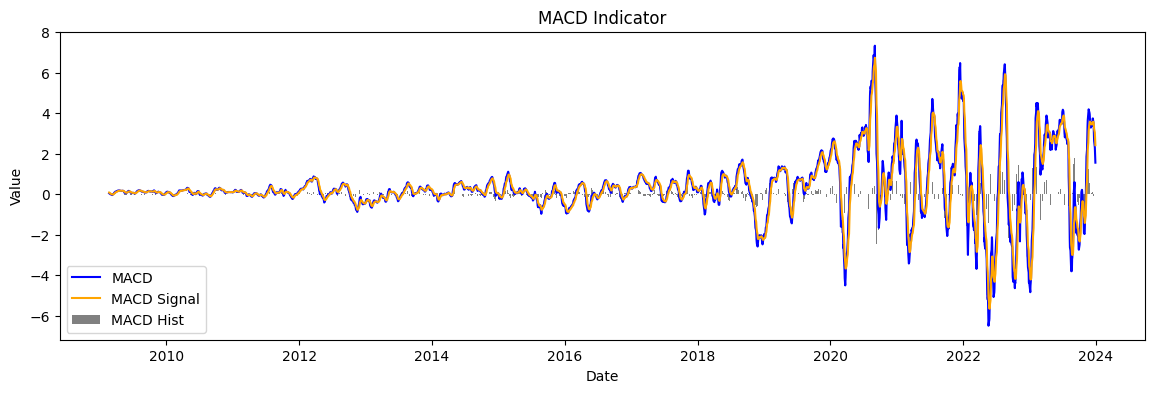

{'marketCap': 4135126302720, 'trailingPE': 37.401344, 'epsTrailingTwelveMonths': 7.45, 'totalRevenue': 416161005568}


In [11]:

import pandas as pd

# Load your data
df = pd.read_csv('../data/raw/AAPL.csv', parse_dates=['Date'])
df = df.set_index('Date').sort_index()

# Initialize class
analysis = StockAnalysis(df)

# Add indicators
analysis.add_technical_indicators()

# Visualize
analysis.plot_price_with_sma()
analysis.plot_rsi()
analysis.plot_macd()

# Get financial metrics (example for Apple)
metrics = analysis.get_financial_metrics('AAPL')
print(metrics)
